# Turing Machine and Deep Learning

## Assignment 4 -- Neural Networks

This notebook is meant for you to review and reflect on the content of Lecture 4, which was mainly about neural networks. In particular, we'll focus on aspects that were only briefly mentioned in class in order for you to get a better understanding of it.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 4" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.

In [15]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer
import tensorflow as tf            # NNs and associated
from tensorflow import keras       # NNs and associated

# Q1 CNNs

In the lecture, we saw some code that implemented MLPs and CNNs for the task of image classification on CIFAR10. However, we skipped over some details of what CNNs actually do.

A CNN works by automatically learning and extracting meaningful patterns, features, and hierarchies from the input data in the following way:

1. **Convolution**: A CNN applies (multiple) small filters (kernels) to an input image, performing element-wise multiplications and sums to extract features like edges, corners, and textures. We also did this computation in person during class. These kernels may be a matrix (what we saw in the lecture), or even a stack of matrices (e.g. for RGB images). I'd recommend watching this [3Blue1Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA&pp=ygUTY29udm9sdXRpb25zIGluIGNubg%3D%3D) and this [DeepLearning.AI](https://www.youtube.com/watch?v=KTB_OFoAQcc) video for reference.
2. **Non-linearity**: Non-linear activation functions (e.g., ReLU) are applied to introduce complexity and allows the capture of more abstract representations.
3. **Pooling**: Pooling operations are used to downsample the spatial dimensions of feature maps while preserving the most important information. In both cases, a pooling window or filter moves across the input feature map, and a single value is selected or computed within the window based on the pooling operation. Pooling helps reduce the computational complexity of the network and introduces some translation invariance. There are a few types of pooling, but most commonly used are max-pooling and average-pooling.
4. **Hierarchy**: Convolution and pooling operations are repeated to create a hierarchy of feature extraction layers, learning more complex and high-level features.
5. **Fully Connected Layers**: Flattened features are passed through fully connected layers, similar to a traditional MLP, for classification or regression.
6. **Training**: Parameters are adjusted using backpropagation and optimization algorithms to minimize the difference between predictions and true labels.

By leveraging convolution, non-linearity, and hierarchical feature extraction, CNNs can automatically learn and recognize intricate patterns and structures in visual data, making them well-suited for tasks like image classification and object detection.

You can think of the convolution operation with a kernel over an image as outputting a new modified image, called a feature map. When applying convolutions over feature maps, the size of the output feature map (in each dimension) can be computed by:

$$o = \frac{i - k + 2 p}{s}+1$$

where the hyperparameters of the convolution are:
- $i$: input_size is the size (height or width) of the input feature map.
- $k$: kernel_size is the size (height or width) of the convolutional kernel/filter.
- $p$: padding is the number of pixels added to each side of the input feature map (if applicable) (default 0)
- $s$: stride is the step size or the number of pixels the kernel moves at each step (default 1)

The output size of a pooling operation can also be defined as:
$$o = \frac{i - p}{s} + 1$$

**Q1.1** Thus, starting with a 28x28 pixel image (e.g. MNIST), write a series of kernel sizes to use in convolutions (optionally including a pooling operation if you want to try it out, and optionally padding and stride) in order to get it down to an image size of 6x6. There are several correct answers possible here.

Convolution with a 5x5 kernel, using a stride of 1 and no padding (output size: 24x24).

Max pooling with a pool size of 2x2 and stride of 2 ( output size: 12x12).

Convolution with a 5x5 kernel, using a stride of 1 and no padding ( in an output size: 8x8).

Max pooling with a pool size of 2x2 and stride of 2 (output size: 4x4).

Convolution with a 3x3 kernel, using a stride of 1 and no padding (output size: 2x2).

Convolution with a 3x3 kernel, using a stride of 1 and no padding (output size: 1x1).

**Q1.2** Now, let's try out your strategy in code. Implement the convolutions you defined above to perform classification over MNIST digits. Note that most of the code is written for you, but be mindful of the steps that are written. Note that you need to choose the number of kernals as well as the size at each layer. The input shape of your next layer is the output shape you computed above and the number of kernels you chose for the previous layer ``input_shape=(w,h,k)``.

In [16]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [28]:
import keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert the labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [27]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (114, 1)
Shape of x_test: (10000, 28, 28, 1)
Shape of y_test: (18, 1)


In [29]:
# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
117/375 [========>.....................] - ETA: 2:41 - loss: 0.4295 - accuracy: 0.8602

KeyboardInterrupt: 

**Q1.3** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

It seems as though there is a slight overfitting beyond 1 epoch, considering that the training loss is lower than the validation loss, and that the training accuracy is higher than the validation accuracy at all subsequent epochs. I would stop the model at around 2 epochs as that is where we observe that the validation loss and accuracy both start to plateau.

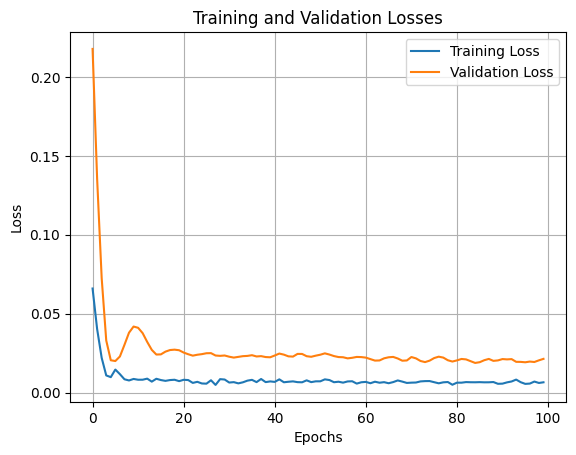

KeyError: 'accuracy'

In [30]:
# Plot losses
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.title('Training and Validation Losses')
plt.show()

# Plot accuracies
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history["val_accuracy"], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.title('Training and Validation Accuracies')
plt.show()

# Q2 RNNs

An RNN (Recurrent Neural Network) is a type of artificial neural network that is particularly effective in processing sequential data. Unlike feedforward neural networks, which process inputs independently, RNNs have connections that allow information to flow in cycles. This cyclic connectivity enables them to capture temporal dependencies and learn patterns over time. You can find more in these [neural network lecture notes (Jaeger 2023, chapter 4)](https://www.ai.rug.nl/minds/uploads/LN_NN_RUG.pdf). Here is an overview of how RNNs work:

- **Recurrent Connections**: RNNs have recurrent connections that allow information to be passed from one step to the next in a sequence. At each time step, the RNN takes an input and combines it with the information from the previous step. This feedback loop enables the network to have memory and make predictions based on the context of past inputs.

- **Hidden State**: RNNs maintain a hidden state vector that serves as a memory of the network. The hidden state is updated at each time step and contains information about the previous inputs in the sequence. It captures the network's understanding of the sequence up to that point and is used to influence the processing of future inputs.

- **Sequence Processing**: RNNs process sequences by iterating through each element one at a time. As the network receives an input at each time step, it updates its hidden state based on the input and the previous hidden state. The updated hidden state is then used to make predictions or generate outputs.

- **Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU)**: LSTMs and GRUs are popular types of RNN architectures that address the vanishing gradient problem and capture long-term dependencies more effectively. These architectures introduce specialized memory cells and gating mechanisms that allow the network to selectively update and forget information.

- **Training**: RNNs are typically trained using the backpropagation through time (BPTT) algorithm, which extends backpropagation to handle sequences. The goal is to minimize the difference between the predicted outputs and the true targets by adjusting the network's parameters through gradient descent optimization.

- **Applications**: RNNs are well-suited for tasks involving sequential data, such as natural language processing, speech recognition, machine translation, time series analysis, and sentiment analysis. They can effectively model dependencies and capture context in these domains.

By leveraging recurrent connections and hidden state information, RNNs excel at processing and understanding sequential data. They are powerful tools for tasks that require temporal modeling and have made significant contributions to the field of deep learning.

Here, we'll use LSTMs to regress on the [Air Passengers](https://www.kaggle.com/datasets/chirag19/air-passengers) dataset, providing monthly totals of a US airline passengers from 1949 to 1960.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
data = pd.read_csv('AirPassengers.csv')
time_series = data['#Passengers'].values.astype(float)

# preprocess, use a scaler to scale the features to 0 and 1
time_series = np.array(time_series).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series = scaler.fit_transform(time_series)

# Split the data into training and testing sets
train_data = time_series[:120]  # First 120 months for training
test_data = time_series[120:]   # Last 24 months for testing

# Function to create input sequences
# Goal: Predict the (n+1)th point given n points
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create input sequences
sequence_length = 6
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the input data to be 3D (batch_size, sequence_length, num_features)
# Standard practice!
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Q2.1** Finish the following cell

In [31]:
# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, 1)),  # 50 LSTM units, input shape (sequence_length, 1)
    keras.layers.Dense(1)  # One output neuron for regression task
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')  # Using mean squared error loss and Adam optimizer
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 3s 280ms/step - loss: 0.0937 - val_loss: 0.0916
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0914 - val_loss: 0.0977
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0914 - val_loss: 0.1005
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0915 - val_loss: 0.0975
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0910 - val_loss: 0.0939
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0906 - val_loss: 0.0915
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0905 - val_loss: 0.0905
Epoch 8/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0904 - val_loss: 0.0903
Epoch 9/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0903 - val_loss: 0.0903
Epoch 10/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0901 - val_loss: 0.0904
Epoch 11/100
3/3 [

**Q2.2** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

This time, it seems that there is always a slight overfitting, considering that the training loss is lower than the validation loss at all epochs. I would stop the model at around 6 epochs as that is where we observe that the training loss starts to plateau, while it is also the point right before the validation loss goes up and again.

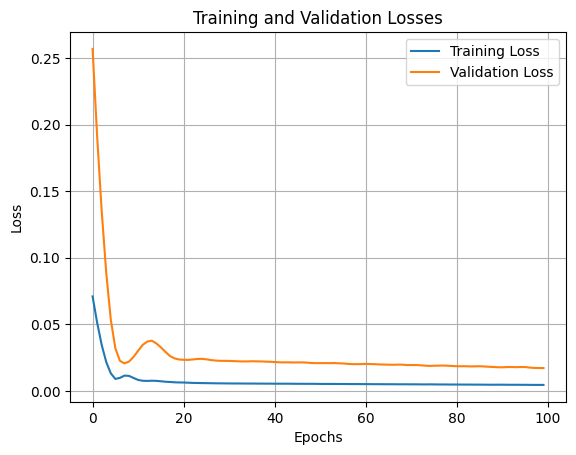

In [21]:
# Your code here
# Plot losses
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.title('Training and Validation Losses')
plt.show()

Now, we can make predictions on our test set and evaluate it!

**Q2.3** Finish the following cell

In [25]:
import keras_tuner as kt

# Define the model building function for hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                                 input_shape=(sequence_length, 1),
                                 return_sequences=True))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(keras.layers.LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32)))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Instantiate the tuner and perform random search
tuner = kt.RandomSearch(build_model,
                         objective='val_loss',
                         max_trials=5,
                         directory='hyperparameter_tuning',
                         project_name='lstm_hyperparameter_tuning')

# Define the callback to stop training if no improvement in validation loss
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform hyperparameter search
tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.2,
             callbacks=[stop_early])

# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

ModuleNotFoundError: No module named 'keras_tuner'

**Q2.4** Does the model do well? Write three ideas on how you would make it better. Implement at least one of these ideas and rerun your code, and report your results.

Considering the train and test scores reported, it seems that the model is not performing very accurately, and we can definitely make it better. We also observe the same visually, as the predictions seem to take much more conservative fluctuations that the real data. Therefore, we can increase the complexity, implement hyperparameter tuning, or regularization.

In [24]:
# Build the LSTM model with dropout regularization
model = keras.Sequential([
    keras.layers.LSTM(100, input_shape=(sequence_length, 1), dropout=0.2),  # Increase LSTM units to 100 and add dropout
    keras.layers.Dense(1)  # One output neuron for regression task
])

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')  # Using mean squared error loss and Adam optimizer
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict on the test set
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Invert predictions to make them original scale
train_preds = scaler.inverse_transform(train_preds)
y_train = scaler.inverse_transform(y_train)
test_preds = scaler.inverse_transform(test_preds)
y_test = scaler.inverse_transform(y_test)

# Calculate root mean squared error
train_score = mean_squared_error(y_train, train_preds)
test_score = mean_squared_error(y_test, test_preds)

print('Train Score: %.2f (MSE)' % (train_score))
print('Test Score: %.2f (MSE)' % (test_score))

Epoch 1/100
3/3 [==============================] - 3s 295ms/step - loss: 0.0659 - val_loss: 0.2178
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0402 - val_loss: 0.1355
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0220 - val_loss: 0.0725
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0108 - val_loss: 0.0330
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0097 - val_loss: 0.0204
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0145 - val_loss: 0.0200
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0116 - val_loss: 0.0228
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0084 - val_loss: 0.0302
Epoch 9/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0076 - val_loss: 0.0379
Epoch 10/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0086 - val_loss: 0.0418
Epoch 11/100
3/3 [

# Q3 NLPs

The guest lecturer of week 5 will talk about natural language processing (NLPs). To prepare for this please watch the following videos and per video tell us one thing you learned.

Videos
Intro (5 minutes); https://www.youtube.com/watch?v=CMrHM8a3hqw

Transform & Bert (10 minutes); https://www.youtube.com/watch?v=SZorAJ4I-sA

Optional; Transform (13 minutes) (more in depth); https://www.youtube.com/watch?v=TQQlZhbC5ps

1. I didn't know it was possible to get rid of the "stop words" as they seem important to me in providing meaning as a human being.

2. I didn't know how revolutionary the transoformer was in comparison the RNN, especially in its ability to speed up the process.